# 1. 数据集

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import make_blobs
x, y = make_blobs(
    n_samples=40, 
    centers=2, 
    random_state=0
)

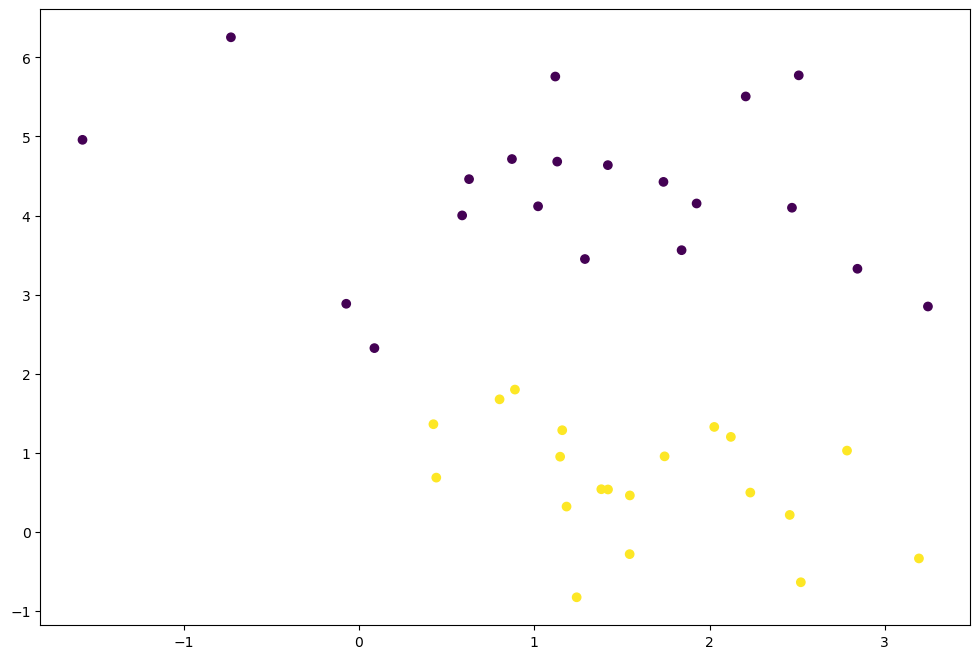

In [19]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

# 2. sklearn中的线性SVM

In [20]:
from sklearn.svm import LinearSVC

In [21]:
# SVC就是 SVM Classifier
# 参数C是正则化参数(c越大,对误差容忍度越小)
clf = LinearSVC(C = 1)

In [22]:
clf.fit(x, y)

LinearSVC(C=1)

In [23]:
clf.score(x, y)

1.0

In [24]:
# 绘制决策边界
def decision_boundary_plot(X, y, clf,ax=None):
    if ax is None:
        ax = plt.gca()
    # 获取X1（第一个特征）的最小值和最大值，并添加1的边界间距
    axis_x1_min, axis_x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    # 获取X2（第二个特征）的最小值和最大值，并添加1的边界间距
    axis_x2_min, axis_x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    # 创建用于评估分类器的网格点
    # np.meshgrid从两个一维数组创建两个二维数组
    # 步长0.01创建细密网格以实现平滑的可视化
    x1, x2 = np.meshgrid(
        np.arange(axis_x1_min, axis_x1_max, 0.01),
        np.arange(axis_x2_min, axis_x2_max, 0.01)
    )
    
    # 预测网格中每个点的类别
    # np.c_将展平的数组作为列连接
    # 将预测结果重塑为与网格相同的形状
    z = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    z = z.reshape(x1.shape)
    
    # 为不同类别创建自定义颜色映射(粉色、浅绿色和浅黄色)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF','#BBFFBB','#F9F9CB'])

    # 使用填充等高线绘制决策边界
    ax.contourf(x1, x2, z, cmap=custom_cmap)
    # 绘制原始数据点，按类别着色
    ax.scatter(X[:,0], X[:,1], c=y)
    # plt.show()

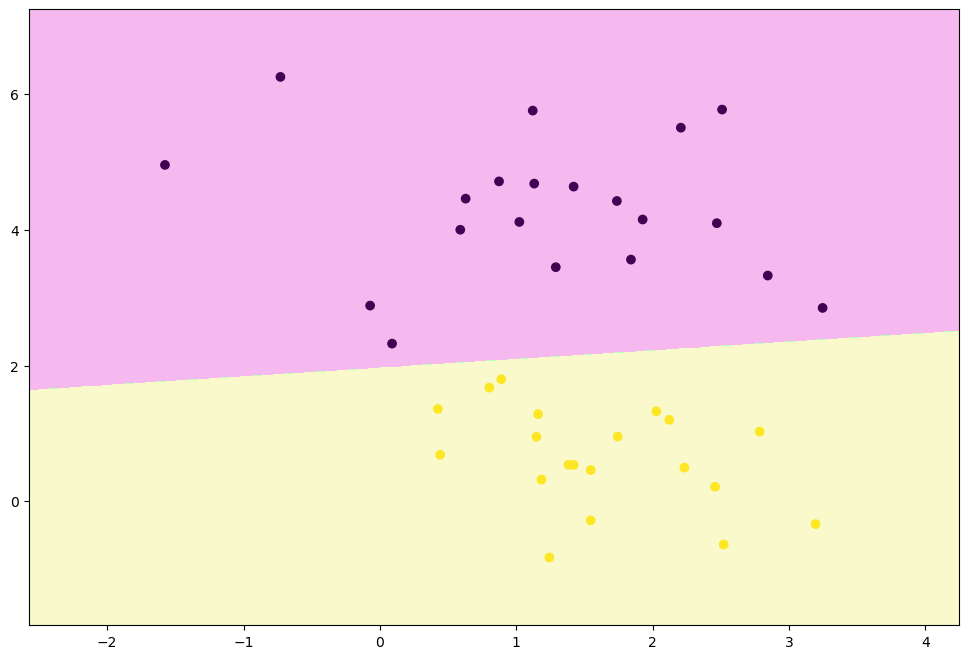

In [25]:
decision_boundary_plot(x, y, clf)
plt.show()

In [26]:
def plot_svm_margin(x, y, clf, ax=None):
    """
    绘制SVM的决策边界和间隔
    
    参数:
    x: 特征数据, shape=(n_samples, n_features)
    y: 标签数据, shape=(n_samples,)
    clf: 训练好的LinearSVC分类器
    ax: matplotlib axes对象,用于绘图,默认为None
    """
    # 使用DecisionBoundaryDisplay绘制决策边界
    from sklearn.inspection import DecisionBoundaryDisplay
    
    # 创建决策边界可视化对象
    DecisionBoundaryDisplay.from_estimator(
        clf,  # 分类器
        x,    # 特征数据
        ax=ax,  # 指定绘图轴
        grid_resolution=50,  # 网格分辨率
        plot_method="contour",  # 使用等高线方式绘制
        colors="k",    # 设置线条颜色为黑色
        levels=[-1, 0, 1],  # 设置等高线级别,0为决策边界,-1和1为间隔边界
        alpha=0.5,     # 设置透明度
        linestyles=["--", "-", "--"]  # 设置线型,虚线表示间隔,实线表示决策边界
    )
    
    # 绘制样本点,用不同颜色区分类别
    plt.scatter(x[:,0], x[:,1], c=y)

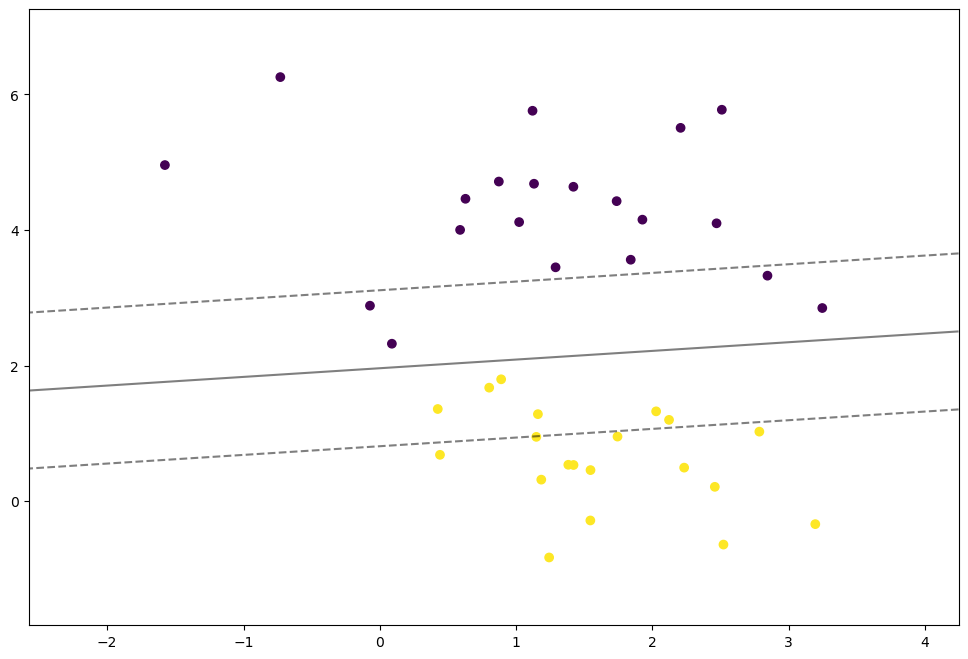

In [27]:
plot_svm_margin(x, y, clf)
plt.show()

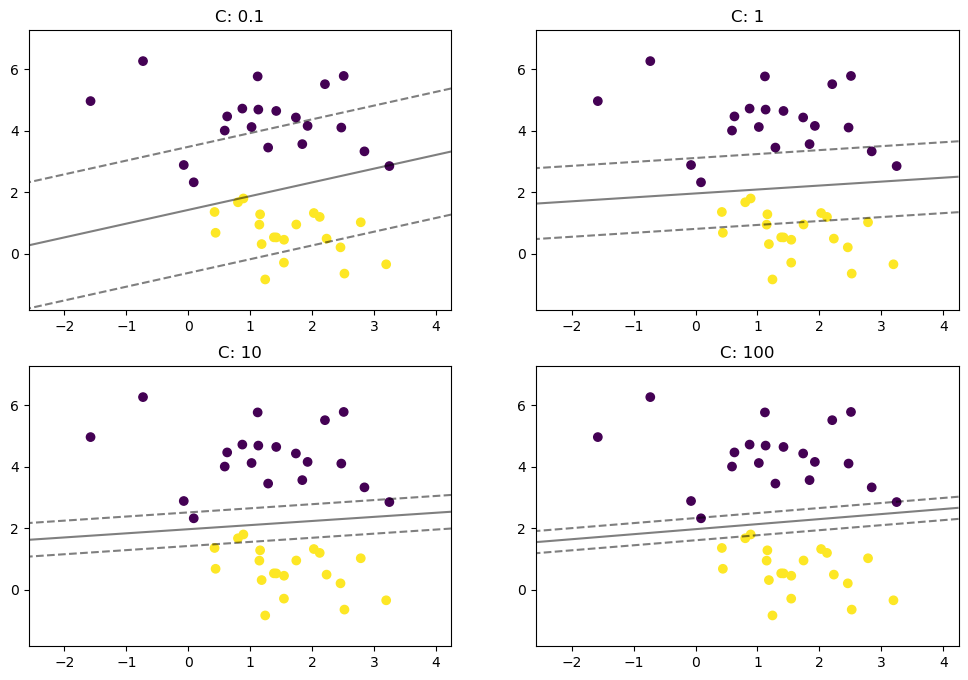

In [28]:
plt.rcParams["figure.figsize"] = (12, 8)

params = [0.1, 1, 10, 100]
for i, c in enumerate(params):
    clf = LinearSVC(C = c, random_state=0)
    clf.fit(x, y)
    
    ax = plt.subplot(2, 2, i + 1)
    plt.title("C: {0}".format(c))
    plot_svm_margin(x, y, clf, ax)
    
plt.show()


可以看到c越大,对误差容忍度越小,约趋向于硬间隔

# 3. 解决多分类问题

In [29]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data[:, 1:3] # 只取前两列特征
y = iris.target

In [30]:
# svm只支持ovr分类策略
clf = LinearSVC(C = 0.1, multi_class='ovr', random_state=0)
clf.fit(x, y)

LinearSVC(C=0.1, random_state=0)

In [31]:
clf.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

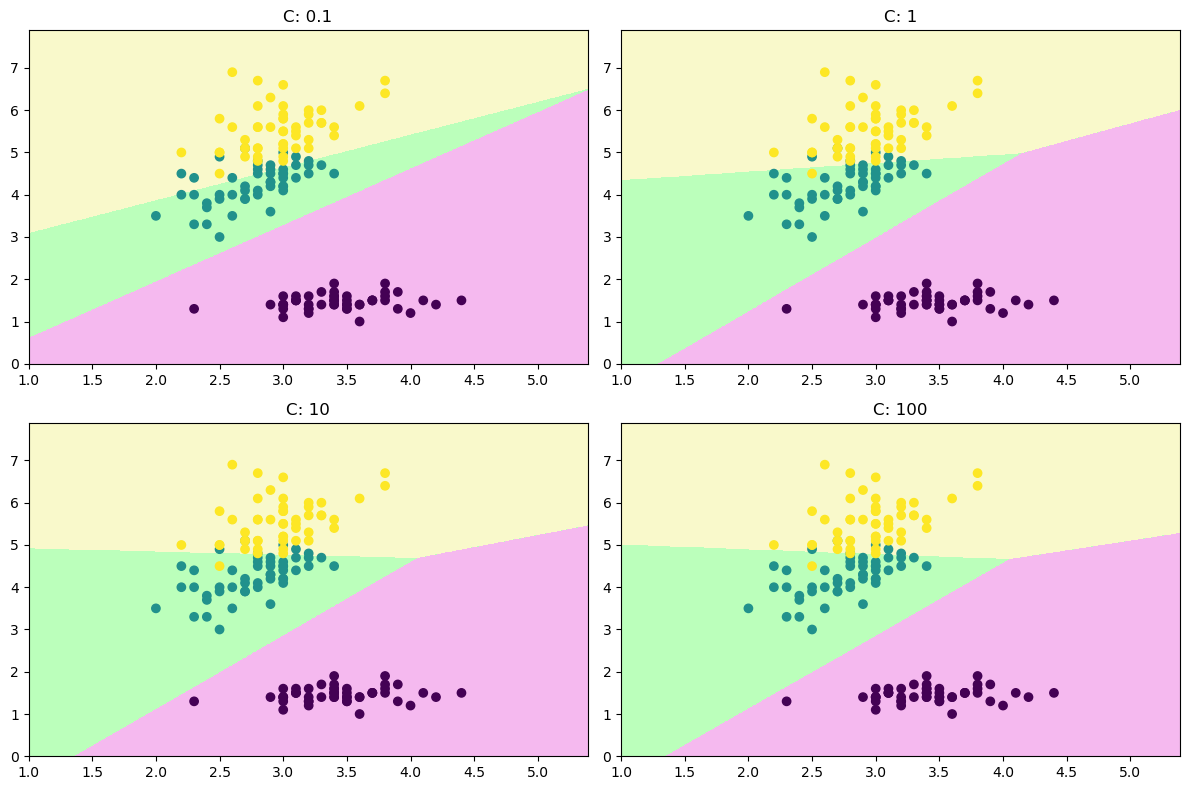

In [32]:

plt.rcParams["figure.figsize"] = (12, 8)

params = [0.1, 1, 10, 100]
for i, c in enumerate(params):
    clf = LinearSVC(C = c, random_state=0)
    clf.fit(x, y)        
    ax = plt.subplot(2, 2, i + 1)
    ax.set_title("C: {0}".format(c))
    decision_boundary_plot(x, y, clf,ax)

plt.tight_layout()  # 调整子图之间的间距，使布局更美观
plt.show()